**IMPORTANT:** If you are running this notebook for the first time, please run the first code cell below by pressing Shift-Enter while in it. If not, please skip it. This digital case study has been developed for Jupyter Notebook Python 3 kernel.

In [1]:
%run ./resources/library.py

The <font color='red'>`style_notebook()`</font> function increases the font size to improve readability. You can skip the cell below if you don't need a larger font size.

In [2]:
style_notebook()

# Notebook 1: Basic Web Mapping Techniques with Data from the John Snow Cholera Outbreak

In this notebook, we will learn about the approach that Dr. John Snow used when he solved the cholera outbreak in London in 1854. Let's watch a short video about the Cholera Outbreak in 1854 London. 

> Run any of the two code cells below:
>* **Option 1:** YouTube (runs on Microsoft Azure and BinderHub Notebook Services)
>* **Option 2:** Run local video file

In [3]:
"""
    Option 1: YouTube (runs in Microsoft Azure and BinderHub environment)

""" 
show_youtube("https://www.youtube.com/embed/lNjrAXGRda4",900,600)

In [4]:
"""
    Option 2: Run local Video File (in resources folder)

"""
show_video_file("resources/John Snow Cholera 23MB.mp4",900,600)

## Learning Objectives (Tier 1)

By the end of this case study the participants should be able to:

**Case Study / Jupyter Notebook Process**
1. Log in to Jupyter Notebook Server or Launch a BinderHub Case Study.
2. Open a Jupyter Notebook from the Jupyter Notebook interface.
3. Physically navigate through the code cells of the Jupyter Notebook Digital Case Study using <mark>`Shift-Enter`</mark>
4. Combine code from different code cells into one.
5. Type answers to questions on designated Jupyter Notebook `MarkDown` cells
6. Write basic Python code on designated Jupyter Notebook code cells (for example, display a dataframe, display a map, alter or type Python code)
7. Access case study references by clicking on links embedded in Jupyter Notebook pages

**Case Study Content (Disease Domain, Public Health Action, Informatics)**
1. Explain the role of information technology (paper or digital) in public health practice
2. Describe the steps taken to draw the John Snow cholera Map
3. Describe the potential benefit of information technology to the 1850 cholera outbreak investigation (if John Snow had the technology you have now, how would this benefit the investigation?)
4. Identify the value generated at each iteration of the Information Value Cycle in the cholera outbreak investigation
5. Contribute to group discussions with case study team (if class format includes group discussions)

## <font color='blue'>Using Lessons Learned from Dr. John Snow (1854) and Soho District Cholera Map</font>

<img src="./images/John_Snow.png" alt="John Snow" style="float:left; padding-right:20px;"/>

Dr. John Snow was a physician from London in 1854 when a cholera outbreak occurred in the Soho district. Soho is an area of the City of Westminster, in the West End of London. 

It was common that waste water was collected within wooden buckets in the basements of London homes in 1854.  There were men known as the "Night Soil Men" that would come to a home to collect waste buckets and dispose of the waste.  London was plagued with many illnesses, stench, and disease. 

There was widespread belief that **"Miasma"** or bad air and stench was the cause of the cholera outbreak in Soho district.

Dr. Snow was skeptical of the Miasma theory and was certain that cholera was likely a water-borne illness. In addition to his systematic process of determining how cholera is transmitted, he began to create maps of the Cholera deaths in Soho and to map the locations of water pumps within the neighborhood. 

> **John Snow Accounts**
>  
> “Within 250 yards of the spot where Cambridge Street joins Broad Street there were upwards of 500 fatal attacks of cholera in 10 days,” Dr. Snow wrote  “As soon as I became acquainted with the situation and extent of this irruption (sic) of cholera, I suspected some contamination of the water of the much-frequented street-pump in Broad Street.”
>
> "Dr. Snow worked around the clock to track down information from hospital and public records on when the outbreak began and whether the victims drank water from the Broad Street pump. Snow suspected that those who lived or worked near the pump were the most likely to use the pump and thus, contract cholera."

### Vibrio Cholera

<img src="./images/Cholera_bacteria_SEM.png" alt="cholera vibrio" width=400 style="float: right; padding: 10px 10px 10px 0px"/>

This is a scanning electron microscope picture of *Vibrio Cholera*, the microorganism responsible for causing Cholera. 

Infection with *V. cholerae* begins with the ingestion of contaminated food or water.
After oral ingestion and passage through the acid barrier of the stomach, the organism colonizes the lining wall of the small intestine. Cholera enterotoxin produced by the adherent vibrios is secreted across the bacterial outer membrane into the extracellular environment and disrupts ion transport by intestinal epithelial cells. The subsequent
loss of water and electrolytes leads to the severe diarrhoea characteristic of cholera [[WHO](http://www.who.int/water_sanitation_health/dwq/admicrob6.pdf)].

### Discussion Questions

1. According to popular belief in 1854 London, what was the cause of cholera?
2. John Snow walked door to door to collect data that he used to draw a paper map. What modern tools could he have used to be more efficient in collecting outbreak data?

   a. To collect and record data: (answer here)  
   b. To draw maps: (answer here)   

## <font color='blue'>Scenario</font>

<img src="./images/tardis.jpeg" alt="cholera vibrio" width=300px style="float: left; padding: 10px 10px 10px 0px"/> For this case study you need a time machine to travel back in time to 1854. Fortunately, you were invited by Dr. Who to travel on the [TARDIS](http://www.thedoctorwhosite.co.uk/tardis/) to 1854 London to observe Dr.John Snow and develop some insights into how effective data management and community engagement can help solve an outbreak.

The TARDIS is the time machine, shaped as a police box, that Dr. Who, the Gallifreyan Time Lord, uses to travel through time and space. TARDIS stands for <font color='red'>T</font>-ime <font color='red'>A</font>-nd <font color='red'>R</font>-elative <font color='red'>D</font>-imension <font color='red'>I</font>-n <font color='red'>S</font>-pace.

We will carry out five data management steps in this notebook to create **value** out of data:

**<font color='red'>Step 1</font>**. Collect the data (locations of pumps and deaths) and load these into `pandas` "dataframes"
 
**<font color='red'>Step 2</font>**. Recreate the basemap of Soho District using `folium` and apply themes for amplified cognition.
 
**<font color='red'>Step 3</font>**. Add the mortality data as data points to the basemap
 
**<font color='red'>Step 4</font>**. Add the water pump data as data points to the basemap
 
**<font color='red'>Step 5</font>**. Bring all code together in one map display

## <font color='blue'>Step 1. Collect the data (pump locations and deaths) and load these into dataframes</font>

### Loading Cholera mortality and pump data

After we have helped Dr. John Snow convert the data to *comma-separated values* (CSV) files, we will use the Python package called [`pandas`](https://pandas.pydata.org/) to extract the data about cholera deaths and pumps from CSV files.

Please run the next three code cells below to (1) import the `pandas` package, (2) read a Comma-Separated Value (CSV) file of Cholera deaths and pumps into their respective dataframes, and (3) display the dataframes. You can read more about `pandas` [here](https://pandas.pydata.org/). You can also read more about `pandas` dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

![Pandas and Swiss Knife](./images/swissknifepandas.png) 

You may have mistaken the term `pandas` for the beautiful mammals in the picture above. The `pandas`library is such a versatile tool you will not forget how to use it. It's like a multi-tool (Swiss) knife for processing data.

<font color=red>`read_csv()`</font> is a `pandas` dot function to read data from CSV files. Note that in the code above the text after the hash symbol `#` are comments and do not get executed. It's good to comment your code so you will remember what it does. Try adding some more commnents to the code to help you understand and remember what the code does in plain language.

In [5]:
# Press Shift-Enter
# Import pandas for use. Use pd as an alias for pandas.
import pandas as pd
pd.__version__

'0.25.3'

In [6]:
# Read the comma-delimited text file (.csv) of cholera deaths and create a dataframe.
deaths_df = pd.read_csv('resources/cholera_deaths.csv')

> Let's display the `deaths_df` dataframe. You can use the `pandas` <font color='red'>`.head()`</font> dot function to display just the first five records (default is 5 records). You can display more or less by adding the number of records to `.head()`: `.head(10)` displays 10 records, `.head(50)` displays 50 records. Note that we use a `_df` suffix to help us remember `deaths_df` is a dataframe.

In [7]:
deaths_df.head()

,FID,DEATHS,LON,LAT
0,0,3,-0.137930,51.513418
1,1,2,-0.137883,51.513361
2,2,1,-0.137853,51.513317
3,3,1,-0.137812,51.513262
4,4,4,-0.137767,51.513204


In [8]:
# Read the comma-delimited text file (.csv) of water pumps and create a dataframe.
pumps_df = pd.read_csv('resources/pumps.csv')

> Now it's your turn to type some Python code...

In [9]:
# Use .head() to display the first five records of pumps_df
# Type the required Python code below.
pumps_df.head()

,FID,LON,LAT,Street
0,250,-0.136668,51.513341,Broadwick Street
1,251,-0.139586,51.513876,Kingly Street
2,252,-0.139671,51.514906,Ramillies Place
3,253,-0.131630,51.512354,Dean Street
4,254,-0.133594,51.512139,Rupert Street


> Let's display the `pumps_df` dataframe. You can use the `pandas` <font color='red'>`.info()`</font> dot function to display information about the dataframe.

In [10]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
FID       250 non-null int64
DEATHS    250 non-null int64
LON       250 non-null float64
LAT       250 non-null float64
dtypes: float64(2), int64(2)
memory usage: 7.9 KB


In [11]:
# Use .info() to display information about pumps_df
# Type the required Python code below.


## <font color='blue'>Step 2.  Recreate the basemap of Soho District</font>

### Viewing the Original Map

In this first mapping exercise, we will digitally recreate a reproduction of the cholera map (Steps 2-5). 

That map will somewhat look like this original map below. 
<img src="./images/20040209cholera.jpg" style="float: left; padding: 0px 10px 0px 0px"/>

### Using `Folium` Maps

In [12]:
# Folium is a web mapping library for Python
import folium
folium.__version__

'0.10.0'

> If you get an error, `NameError: name 'folium' is not defined`, please run the code to load Python packages in Notebook 0 (Prepare Environment).
>  
> You can learn more about Folium [here](http://python-visualization.github.io/folium/).

In [13]:
# use the latitude and Longitude coordinates of the Soho District center
SOHO_COORDINATES = (51.513578, -0.136722)

We used `SOHO_COORDINATES` as a Python variable to store latitude and longitude values, also known as a `point`. In the Python programming language, this data structure is called a `tuple`. As we will be using at least two types of data structures in this case study, you can learn more about other data structures using this Python tutorial on [data structures](https://www.datacamp.com/community/tutorials/data-structures-python). 

In [14]:
# Continue pressing Shift-Enter
# create a basemap centered on the Soho District
# Try changing the zoom level and press "Shift-Enter" to reload map1
map1 = folium.Map(location=SOHO_COORDINATES, zoom_start=17)
map1

Please note that Broadwick Street is the famous street where the "Broad Street Pump" was located in 1854.

The map above, represented as the `map1` variable, is based on [Open Street Map](https://en.wikipedia.org/wiki/OpenStreetMap) tiles. OpenStreetMap (OSM) is a collaborative project to create a free editable map of the world. It is considered a prominent example of volunteered, or "crowdsourced" geographic information.

### Folium Themes

Let's use a `Folium` theme called `stamentoner` and redisplay the map. This will enable you to approximate the appearance of Dr. John Snow's original cholera map.

In [20]:
# Let's add the "Stamen Toner" tile layer to the basemap, map1
folium.TileLayer('stamentoner').add_to(map1)

In [21]:
# Display map1
# In case you want to get back to the original zoom and location just re-run this code cell (or press Shift-Enter)
map1

> Please practice playing with the map above by zooming in and out and locating Broadwick Street. 
>


### Applying Amplified Cognition

Let's switch the tile layer to `cartodbpositron` for [amplified cognition](https://infovis-wiki.net/wiki/Amplified_cognition). A subdued background will enable us to better see map markers.

> #### Notes about Amplified Cognition
> **Amplified cognition** is an important goal of [information visualizaton](https://hal.inria.fr/hal-00701741/document). Dr. John Snow illustrated this concept by creating a spot map of all the cases in the district. You may also think of amplified cognition as increasing the **signal-to-noise ratio** of visual communication (increasing perception of useful information and minimizing noise or less useful information).

Congratulations! You have created your first web maps using the `folium` package. That's just the basemap. You can now add data about the cholera deaths and pumps as points on the map.

In [16]:
map1 = folium.Map(location=SOHO_COORDINATES, zoom_start=17)

# Try to change the theme to "cartodbpositron" below
folium.TileLayer('cartodbpositron').add_to(map1)

# Display map1
map1

## <font color='blue'>Step 3.  Add the mortality data as data points to the basemap.</font>

We used the variable `deaths_df` as a dataframe to store the data from the `cholera_deaths.csv` file. We used `pandas` again to do that.

In [23]:
# Display the dataframe
deaths_df.head()

,FID,DEATHS,LON,LAT
0,0,3,-0.137930,51.513418
1,1,2,-0.137883,51.513361
2,2,1,-0.137853,51.513317
3,3,1,-0.137812,51.513262
4,4,4,-0.137767,51.513204


### Mapping Mortality Data

In the Python code below, `LAT` and `LON` are variables that store the data from `LAT` (latitude) and `LON` (longitude) columns from `deaths_df` dataframe. These are also your latitude, longitude coordinates. We will also create two lists: `locationlist`, which stores all the coordinates, and `radiuslist`, which has all the deaths. The number of deaths for each point will determine the radius (size) of the point on the map.

In [24]:
locationlist = deaths_df[["LAT","LON"]].values.tolist()
radiuslist = deaths_df[["DEATHS"]].values.tolist()

> Note in the code above <font color='red'>`.values`</font> and <font color='red'>`.to_list()`</font> "chained" together.
>   


We can check what these commands do to the `deaths_df` data by displaying their contents to a notebook cell.

In [25]:
deaths_df[["LAT","LON"]].values.tolist()

[[51.513418, -0.13793],
 [51.513360999999996, -0.137883],
 [51.513317, -0.137853],
 [51.513262, -0.137812],
 [51.513203999999995, -0.137767],
 [51.513184, -0.137537],
 [51.513359, -0.1382],
 [51.513328, -0.138045],
 [51.513323, -0.138276],
 [51.513427, -0.138223],
 [51.513381, -0.138337],
 [51.513462, -0.13856300000000002],
 [51.513216, -0.138426],
 [51.513169, -0.138378],
 [51.513116, -0.138337],
 [51.51324, -0.13864500000000002],
 [51.513164, -0.138698],
 [51.513178, -0.137924],
 [51.513111, -0.13786500000000002],
 [51.513055, -0.137811],
 [51.513441, -0.138762],
 [51.513591999999996, -0.138799],
 [51.513402, -0.139045],
 [51.51338, -0.13897],
 [51.513411, -0.13886300000000001],
 [51.513641, -0.138752],
 [51.513692999999996, -0.138808],
 [51.513745, -0.138856],
 [51.513676000000004, -0.13888699999999998],
 [51.51359, -0.139239],
 [51.513663, -0.139321],
 [51.513502, -0.139316],
 [51.513583000000004, -0.13961600000000002],
 [51.513541, -0.139719],
 [51.513298, -0.140074],
 [51.5132909

In [26]:
deaths_df[["DEATHS"]].values.tolist()

[[3],
 [2],
 [1],
 [1],
 [4],
 [2],
 [2],
 [2],
 [3],
 [2],
 [2],
 [1],
 [3],
 [1],
 [4],
 [1],
 [1],
 [1],
 [4],
 [3],
 [2],
 [1],
 [2],
 [2],
 [2],
 [1],
 [1],
 [3],
 [1],
 [1],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [2],
 [8],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [4],
 [1],
 [1],
 [1],
 [1],
 [4],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [2],
 [2],
 [1],
 [2],
 [3],
 [1],
 [4],
 [15],
 [3],
 [4],
 [5],
 [2],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [4],
 [2],
 [1],
 [4],
 [4],
 [1],
 [4],
 [1],
 [1],
 [2],
 [1],
 [2],
 [3],
 [1],
 [4],
 [1],
 [1],
 [7],
 [3],
 [8],
 [1],
 [1],
 [5],
 [8],
 [2],
 [1],
 [1],
 [2],
 [1],
 [2],
 [2],
 [3],
 [1],
 [2],
 [2],
 [3],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [3],
 [3],
 [3],
 [3],
 [1],
 [2],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [5],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1

> Recall from the "Information Value Cycle", by having the capability to store, manage (including transform) and retrieve data, we generate "value" from this additional process.

### Loading the data points on the digital basemap

We will use a type of `folium` marker type called a `CircleMarker` to draw circles instead of points. Let's fill the circles with the color <font color='red'>red</font>. 

Now, you can create the cholera deaths as points on the map by using a `for` loop to iterate through the `LAT` and `LON` values in `locationlist` while using number of deaths in `radiuslist` to determine the radius of the circle. Learn more about `for` loops from this [brief tutorial](https://www.datacamp.com/community/tutorials/for-loops-in-python).

In [27]:
map1 = folium.Map(location=SOHO_COORDINATES, zoom_start=17)

folium.TileLayer('cartodbpositron').add_to(map1)

# Iterate through the rows of the cholera deaths data frame 
#    and add each cholera death circle marker to map1
for i in range(0, len(locationlist)):
    
    # Create a popup for each marker
    # Each marker will show point information and 
    #   number of deaths in that location.
    popup = folium.Popup('Location: '+'('+str(locationlist[i][0])+\
                         ', '+str(locationlist[i][1])+')'+\
                         '<br/>'+\
                        'Deaths: '+ str(radiuslist[i][0]))
    
    # Add each circle marker with popup representing 
    #   a location with deaths to map1
    folium.CircleMarker(
                    location=locationlist[i], \
                    radius=radiuslist[i], \
                    popup=popup, \
                    color='black', \
                    weight=1, \
                    fill=True, \
                    fill_color='red', \
                    fill_opacity=1).add_to(map1)

map1    

### Discussion Questions

1. What is the difference between use of paper maps versus digital maps in "amplifying cognition"?
2. Where do you find the most number of deaths on the map and how many deaths are on that location? (Clue: Click on the markers and you will see the pop-up windows with data in it.)

## <font color='blue'>Step 4.  Add the water pump data as data points to the basemap.</font>

Let's display the dataframe by typing `pumps_df` in the code cell below.

In [23]:
pumps_df

,FID,LON,LAT,Street
0,250,-0.136668,51.513341,Broadwick Street
1,251,-0.139586,51.513876,Kingly Street
2,252,-0.139671,51.514906,Ramillies Place
3,253,-0.131630,51.512354,Dean Street
4,254,-0.133594,51.512139,Rupert Street
5,255,-0.135919,51.511542,Bridle Lane
6,256,-0.133962,51.510019,Regent Street
7,257,-0.138199,51.511295,Warwick Street


### Load pump data points to the map

In [28]:
map1 = folium.Map(location=SOHO_COORDINATES, zoom_start=17)

folium.TileLayer('cartodbpositron').add_to(map1)

# Iterate through the rows of the cholera deaths data frame 
#    and add each cholera death circle marker to map1
for i in range(0, len(locationlist)):

    # Each marker will show point information and 
    #   number of deaths in that location.
    #
    # Compose popup text as HTML string
    popup_text = '<b>Location:</b> '+'('+str(locationlist[i][0])+\
                 ', '+str(locationlist[i][1])+')'+\
                 '<br/>'+\
                 '<b>Deaths:</b> '+ str(radiuslist[i][0])
    # Create a popup for each marker
    popup_death = folium.Popup(popup_text, max_width=200)
    
    # Add each circle marker with popup representing 
    #   a location with deaths to map1
    folium.CircleMarker(
                    location=locationlist[i], \
                    radius=radiuslist[i], \
                    popup=popup_death, \
                    color='black', \
                    weight=1, \
                    fill=True, \
                    fill_color='red', \
                    fill_opacity=1).add_to(map1)

# Iterate through the rows of the pumps_df data frame 
#   and add each water pump to map1
for each in pumps_df.iterrows():
    
    # Each marker will show pump location information
    # Compose popup text
    popup_text = '<b>Location:</b> '+'('+str(each[1]['LAT'])+', '+str(each[1]['LON'])+')'+\
                 '<br/>'+\
                 '<b>Street Name:</b> '+each[1]['Street']
    # Create a popup for each marker
    popup_pump = folium.Popup(popup_text, max_width=200)

    # Add each circle marker with popup representing 
    #   a pump location to map1
    folium.RegularPolygonMarker([each[1]['LAT'],each[1]['LON']], \
                    color='black', \
                    weight=1,\
                    fill_opacity=1, \
                    fill_color='blue', \
                    number_of_sides=4, \
                    popup=popup_pump, \
                    radius=10).add_to(map1)

map1 

Don't forget to test the popups!

### Discussion Questions

1. What do you observe about the distribution of deaths and pumps on the digital map?
2. If you were Dr. John Snow and had unlimited resources and technology at your disposal, what other kinds of data can you add to map to help you better understand what's going on in the outbreak?

## <font color='blue'>Step 5. Bring all the code together in one map display</font>

Let's put together all the key pieces of code without the narratives so you can play with it. 

<img src="./images/fullscreen_button.png" width='400px' style="float: left; padding: 0px 10px 0px 0px"/> We can add some more features to our basic folium map using folium plugins. Let's add a "full screen" button on the upper right hand corner of the map, so we can see the map display in full. 

In [29]:
import pandas as pd
import folium

# let's import the folium plugins
from folium import plugins

deaths_df = pd.read_csv('resources/cholera_deaths.csv')
pumps_df = pd.read_csv('resources/pumps.csv')

SOHO_COORDINATES = (51.513578, -0.136722)

map1 = folium.Map(location=SOHO_COORDINATES, zoom_start=17)

folium.TileLayer('cartodbpositron').add_to(map1)

locationlist = deaths_df[["LAT","LON"]].values.tolist()
radiuslist = deaths_df[["DEATHS"]].values.tolist()

# Iterate through the rows of the cholera deaths data frame 
#    and add each cholera death circle marker to map1
for i in range(0, len(locationlist)):

    # Each marker will show point information and 
    #   number of deaths in that location.
    #
    # Compose popup text as HTML string
    popup_text = '<b>Location:</b> '+'('+str(locationlist[i][0])+\
                 ', '+str(locationlist[i][1])+')'+\
                 '<br/>'+\
                 '<b>Deaths:</b> '+ str(radiuslist[i][0])
    # Create a popup for each marker
    popup_death = folium.Popup(popup_text, max_width=200)
    
    # Add each circle marker with popup representing 
    #   a location with deaths to map1
    folium.CircleMarker(
                    location=locationlist[i], \
                    radius=radiuslist[i], \
                    popup=popup_death, \
                    color='black', \
                    weight=1, \
                    fill=True, \
                    fill_color='red', \
                    fill_opacity=1).add_to(map1)
    
# Iterate through the rows of the pumps_df data frame 
#   and add each water pump to map1
for each in pumps_df.iterrows():
    
    # Each marker will show pump location information
    # Compose popup text
    popup_text = '<b>Location:</b> '+'('+str(each[1]['LAT'])+', '+str(each[1]['LON'])+')'+\
                 '<br/>'+\
                 '<b>Street Name:</b> '+each[1]['Street']
    # Create a popup for each marker
    popup_pump = folium.Popup(popup_text, max_width=200)

    # Add each circle marker with popup representing 
    #   a pump location to map1
    folium.RegularPolygonMarker([each[1]['LAT'],each[1]['LON']], \
                    color='black', \
                    weight=1,\
                    fill_opacity=1, \
                    fill_color='blue', \
                    number_of_sides=4, \
                    popup=popup_pump, \
                    radius=10).add_to(map1)

# let's use the "Fullscreen" plugin
# add the button to the top right corner
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(map1)

map1

### Pickle Functions in `pandas`

Finally, let's **pickle** our dataframes. Pickling with the <font color='red'>`to_pickle()`</font> dot function allows us to save the dataframes to disk and retrieve these later, to use in another notebook.

"Pickling" allows us to save and retrieve dataframes for future use.  

> From Wikipedia: A pickled cucumber (pickle) is a cucumber that has been pickled in a brine, vinegar, or other solution and left to ferment for a period of time, by either immersing the cucumbers in an acidic solution or through souring by lacto-fermentation. Pickled cucumbers are often part of mixed pickles. 

In [30]:
# Pickling dataframes
deaths_df.to_pickle("outputs/deaths_df.pickle")
pumps_df.to_pickle("outputs/pumps_df.pickle")

In [31]:
# Let's check if the pickle files were created...
!ls -la outputs/*.pickle

-rw-r--r-- 1 jovyan users  8855 Dec  1 07:43 outputs/deaths_df.pickle
-rw-r--r-- 1 jovyan users 13131 Aug 19 09:29 outputs/mean_center_df.pickle
-rw-r--r-- 1 jovyan users  1272 Dec  1 07:43 outputs/pumps_df.pickle


### The Information Value Cycle

Data collected increases in value as information systems transform data to information and to knowledge, and enable effective use of the data to improve population health. By applying informatics problem solving knowledge and skills, informatics practitioners, including GEEKS fellows, are able to diagnose gaps in **value creation** and implement solutions to maximize benefits (value) from investments (time, money, effort) in information systems.

See the Information Value Cycle diagram below.
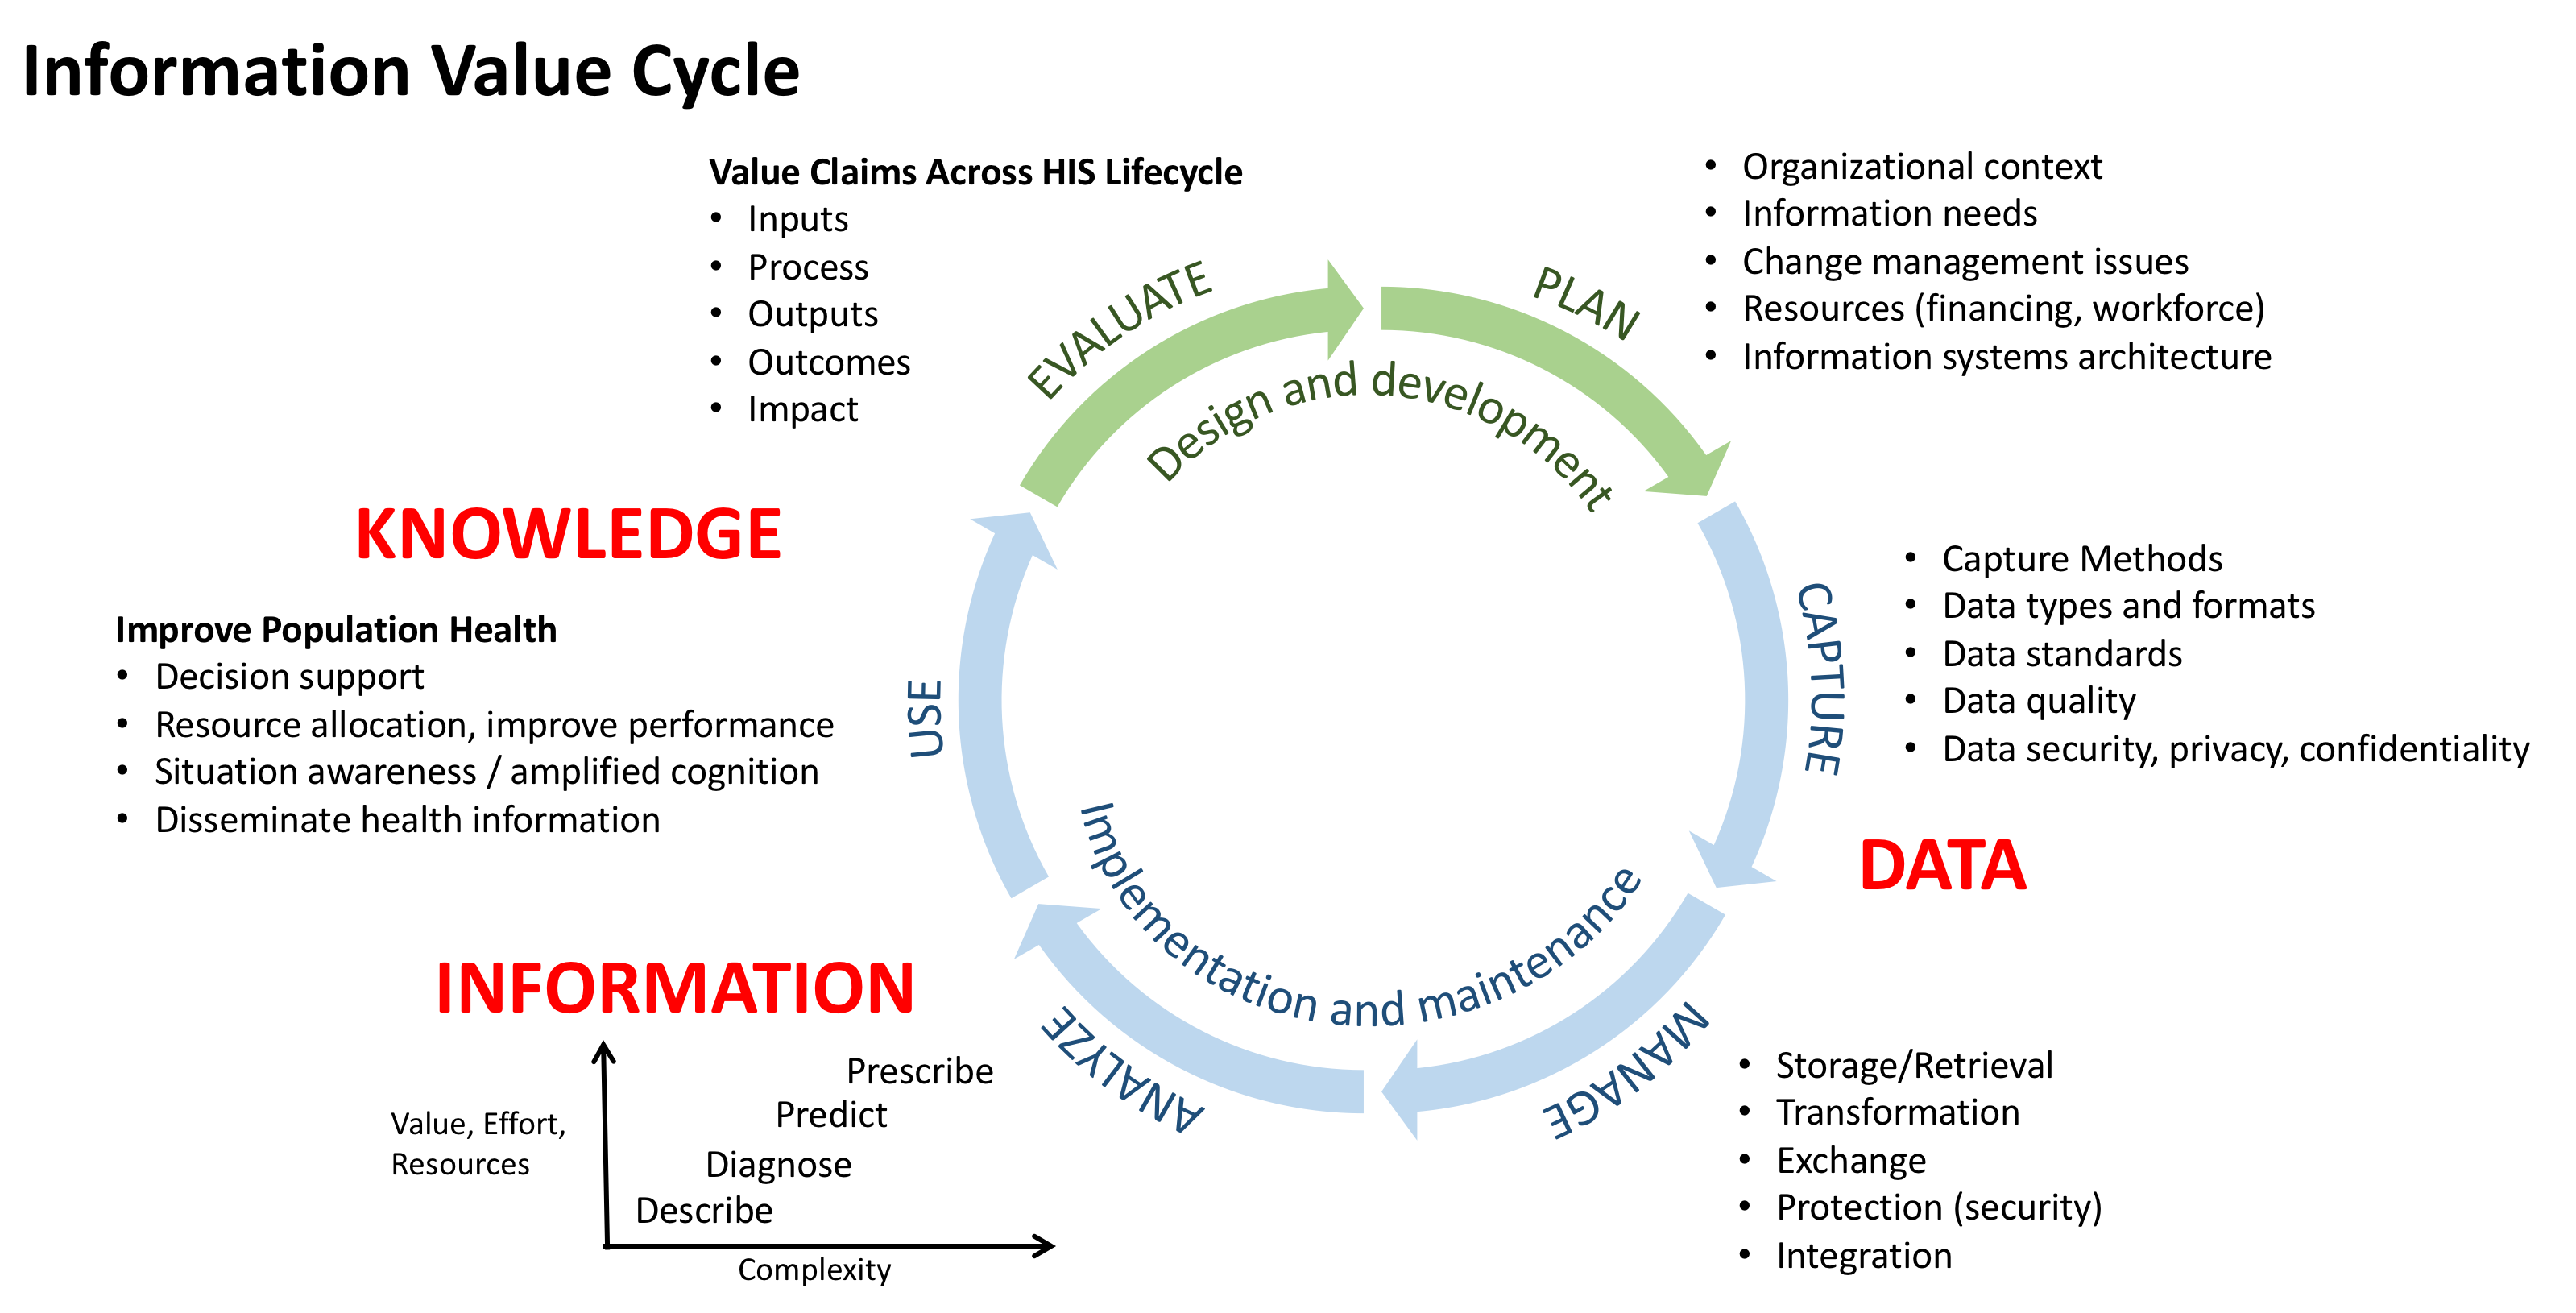

As a famed data science hacker who graduated from GEEKS Tier 1 training and have helped Dr. John Snow solve the cholera outbreak with digital tools. Having gone through this first notebook in the 1854 Cholera Case Study, you have become much more aware of the potential (and pitfalls) of using technology for public health.

###  Congratulations !   

You have recreated the famous John Snow Cholera map within a Jupyter notebook. 

### Discussion Questions

1. Cholera is a water-borne disease that still plagues many parts of the world today. 

   **How can technologies such as Geographical Information Systems (GIS) and Jupyter notebooks help us to map water and waste-water sources to help prevent future outbreaks?** 
   
      
2. The Cholera outbreak mapping involved the use of a basemap (streets) and two operational layers (cholera deaths and water pumps). Dr. Snow was an eminent scientist of his day and yet his data and his map were only part of his solution. Dr. Snow went door to door to talk with families with Cholera deaths during the outbreak. He met with local church leaders and convinced them to remove the Broad street pump handle through his data-driven, evidence-based approach. 

  **What other skills did you think Dr. John Snow applied to carry out his investigation?**
     
  
3. Think for a while that you are having a discussion with Dr. John Snow. 

   **What other enhancements can information technology offer the 1854 Cholera outbreak investigation from start to finish, if you could make it available and recommend these to Dr. Snow?**


## References


### Cholera

1. Tuthill K. John Snow and the Broad Street Pump: On the Trail of an Epidemic. UCLA School of Public Health Web Site. URL: http://www.ph.ucla.edu/epi/snow/snowcricketarticle.html
2. Brody, Howard, et al. "Map-making and myth-making in Broad Street: the London cholera epidemic, 1854." The Lancet 356.9223 (2000): 64-68. URL (Lancet): https://www.thelancet.com/pdfs/journals/lancet/PIIS0140-6736(00)02442-9.pdf; URL (UCLA): http://www.ph.ucla.edu/epi/snow/mapmyth/mapmyth.html
3. Report on the Cholera Outbreak in the Parish of St. James, Westminster, during the Autumn of 1854. URL: http://johnsnow.matrix.msu.edu/work.php?id=15-78-55
4. Snow, John. "On the mode of communication of cholera." Edinburgh Medical Journal 1.7 (1856): 668. Reprint URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5307547/pdf/edinbmedj73529-0094a.pdf
5. Lessler, Justin, et al. "Mapping the burden of cholera in sub-Saharan Africa and implications for control: an analysis of data across geographical scales." The Lancet 391.10133 (2018): 1908-1915. URL: https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(17)33050-7/fulltext
6. CDC, Cholera in Africa. URL: https://www.cdc.gov/cholera/africa/index.html


### Data Visualizaton

1. Fekete, Jean-Daniel, et al. "The value of information visualization." Information visualization. Springer, Berlin, Heidelberg, 2008. 1-18.

*For case study suggestions for improvement, please contact Herman Tolentino, Jan MacGregor, James Tobias or Zhanar Haimovich.*

## Revision History

**2019-11-30**: Removed heat map, added tutorial links, cleaned up code - HT  

**2019-08-01**:
* Using Folium 0.10.0
* Added Heat Map

**2019-05-12**: Added folium plugins (Fullscreen Plugin) to last map - HT  

**2019-05-24**: 
* Using Folium 0.9
* Changed Polygon Markers to Circle Markers (HT)